In [237]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
# Import plot styles and use 'fivethirtyeight' style
import matplotlib.style as style
style.use('fivethirtyeight')
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [147]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# Part 1: Summary DataFrame

In [117]:
# Total fares:

total_fares = pyber_data_df.groupby("type").sum()["fare"]

# Total rides:

total_rides = pyber_data_df.groupby("type").count()["ride_id"]

# Total drivers:

total_drivers = city_data_df.groupby("type").sum()["driver_count"]

In [118]:
# Average fare per ride:

avg_fare_per_ride = total_fares / total_rides

In [119]:
# Average fare per driver:

avg_fare_per_driver = total_fares / total_drivers

In [135]:
summary = {"Total Rides": total_rides, 
           "Total Drivers": total_drivers, 
           "Total Fares": total_fares, 
           "Average Fare per Ride": avg_fare_per_ride, 
           "Average Fare per Driver": avg_fare_per_driver
          }

summary_df = pd.DataFrame(summary)

format_dict = {"Total Fares": '${0:,.2f}', "Average Fare per Ride":'${0:,.2f}', "Average Fare per Driver":'${0:,.2f}'}
summary_df.index.name = None

summary_df.style.format(format_dict)

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


# Part 2: Multiple-Line Plot

In [276]:
pyber_plot_df = pyber_data_df.rename(columns = {'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
pyber_plot_df = pyber_plot_df.set_index('Date')

pyber_fare_df = pyber_plot_df.copy()[["City Type", "Fare"]]
pyber_fare_df.index = pd.to_datetime(pyber_fare_df.index)
#pyber_fare_df.Index.format = pd.to
pyber_fare_df.info()
pyber_fare_type_df = pyber_fare_df.groupby(["City Type", "Date"]).sum()
pyber_fare_type_df = pyber_fare_type_df.reset_index()
pyber_fare_type_df = pyber_fare_type_df.pivot(index = "Date", columns = "City Type")
pyber_fare_type_df = pyber_fare_type_df['2019-01-01':'2019-04-28']["Fare"]
pyber_fare_type_df
#pyber_fare_type_df
#new_df = pyber_fare_type_df.loc[i for i in np.unique(new_df.index.date)]
#t = pd.date_range('2019-01-01', '2019-04-28').date
#t
#pyber_fare_type_df.loc[i for i in t]
#new_df = new_df.resample()
#new_df
#week_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [277]:
week_df = pyber_fare_type_df.resample('W').sum()
week_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


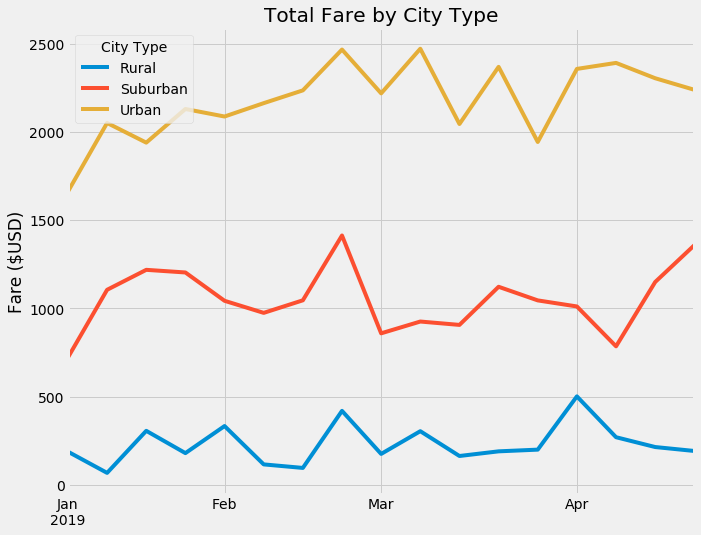

In [281]:
week_df.plot(figsize=(10, 8))
plt.title("Total Fare by City Type")
plt.xlabel("")
plt.ylabel("Fare ($USD)")
# Save Figure
plt.savefig("analysis/ChallengeFig1.png")
# Show Figure
plt.show()